<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/VAR_Value_at_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
pip install PyPortfolioOpt

# **VAR - Value at risk**

In [3]:
import yfinance as yf ,numpy as np, datetime as dt, matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from scipy.stats import norm

In [4]:
tickers = ["CVX","AAPL","AMZN","KO","WMT","JPM"]

In [5]:
Start = dt.datetime(2019,1,1)
end_1 = dt.datetime(2022,3,25)
end = dt.datetime.now()

df = yf.download(tickers,Start,end)["Adj Close"]
df=df.dropna()
df

[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,CVX,JPM,KO,WMT
Date,,,,,,
2019-01-02,38.105137,76.956497,92.325302,87.878342,41.413990,87.205612
2019-01-03,34.309589,75.014000,90.557037,86.629463,41.158077,86.757149
2019-01-04,35.774235,78.769501,92.433739,89.823082,41.978771,87.299042
2019-01-07,35.694603,81.475502,93.634811,89.885506,41.431641,88.326744
2019-01-08,36.375057,82.829002,93.226112,89.716011,41.899345,88.943367
...,...,...,...,...,...,...
2022-12-05,146.630005,91.010002,176.559998,131.369995,63.470001,151.080460
2022-12-06,142.910004,88.250000,172.009995,131.589996,63.439999,149.327072
2022-12-07,140.940002,88.459999,172.520004,131.500000,63.540001,148.550003


In [6]:
df.describe()
df.tail

<bound method NDFrame.tail of                   AAPL       AMZN         CVX         JPM         KO  \
Date                                                                   
2019-01-02   38.105137  76.956497   92.325302   87.878342  41.413990   
2019-01-03   34.309589  75.014000   90.557037   86.629463  41.158077   
2019-01-04   35.774235  78.769501   92.433739   89.823082  41.978771   
2019-01-07   35.694603  81.475502   93.634811   89.885506  41.431641   
2019-01-08   36.375057  82.829002   93.226112   89.716011  41.899345   
...                ...        ...         ...         ...        ...   
2022-12-05  146.630005  91.010002  176.559998  131.369995  63.470001   
2022-12-06  142.910004  88.250000  172.009995  131.589996  63.439999   
2022-12-07  140.940002  88.459999  172.520004  131.500000  63.540001   
2022-12-08  142.649994  90.349998  173.539993  132.880005  63.810001   
2022-12-09  142.160004  89.089996  168.000000  132.160004  63.139999   

                   WMT  
Date    

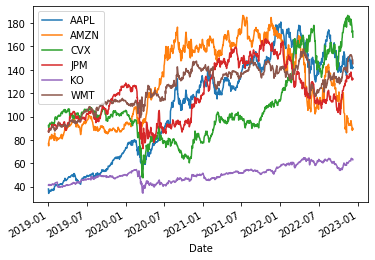

In [7]:
df.plot()
plt.show()

,AAPL,AMZN,CVX,JPM,KO,WMT
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.025241,-0.019153,-0.014211,-0.006179,-0.005143
2019-01-04,0.042689,0.050064,0.020724,0.036865,0.019940,0.006246
2019-01-07,-0.002226,0.034353,0.012994,0.000695,-0.013034,0.011772
2019-01-08,0.019063,0.016612,-0.004365,-0.001886,0.011289,0.006981
...,...,...,...,...,...,...
2022-12-05,-0.007983,-0.033146,-0.024692,-0.028041,-0.013675,-0.010247
2022-12-06,-0.025370,-0.030326,-0.025770,0.001675,-0.000473,-0.011606
2022-12-07,-0.013785,0.002380,0.002965,-0.000684,0.001576,-0.005204


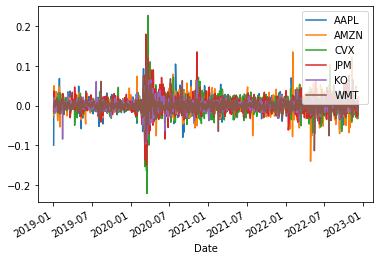

In [8]:
retourns = df.pct_change() # Retornos 
retourns.plot()
retourns

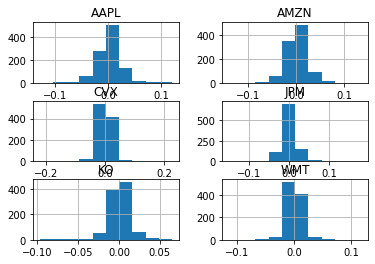

In [9]:
retourns.hist() # Histograma Retornos
plt.show()

In [10]:
cov_matrix = retourns.cov() # Matriz de varianzas y Covarianzas 
cov_matrix 

,AAPL,AMZN,CVX,JPM,KO,WMT
AAPL,0.000474,0.000319,0.000196,0.000221,0.000143,0.000128
AMZN,0.000319,0.000507,0.000117,0.000148,0.000088,0.000110
CVX,0.000196,0.000117,0.000576,0.000344,0.000164,0.000074
JPM,0.000221,0.000148,0.000344,0.000467,0.000177,0.000089
KO,0.000143,0.000088,0.000164,0.000177,0.000211,0.000084
WMT,0.000128,0.000110,0.000074,0.000089,0.000084,0.000219


In [11]:
corr = retourns.corr() # correlaciones 
corr

,AAPL,AMZN,CVX,JPM,KO,WMT
AAPL,1.000000,0.650965,0.375823,0.469304,0.451370,0.395656
AMZN,0.650965,1.000000,0.215681,0.304313,0.270171,0.329103
CVX,0.375823,0.215681,1.000000,0.662588,0.471840,0.209813
JPM,0.469304,0.304313,0.662588,1.000000,0.564219,0.279206
KO,0.451370,0.270171,0.471840,0.564219,1.000000,0.391928
WMT,0.395656,0.329103,0.209813,0.279206,0.391928,1.000000


In [12]:
avg_retorns = retourns.mean() # Promedio de retornos 
avg_retorns

AAPL    0.001564
AMZN    0.000401
CVX     0.000894
JPM     0.000643
KO      0.000531
WMT     0.000624
dtype: float64

In [13]:
count = retourns.count() # Numero de retornos 
count

AAPL    993
AMZN    993
CVX     993
JPM     993
KO      993
WMT     993
dtype: int64

# **Portafolio Eficiente**

In [14]:
acoes = ["CVX","AAPL","AMZN","KO"]
carteira = pd.DataFrame()
for i in acoes:
  carteira[i] = yf.download(i,Start,end_1,interval="1wk")['Adj Close']
carteira=carteira.dropna()
carteira

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,CVX,AAPL,AMZN,KO
Date,,,,
2019-01-01,93.634819,35.694618,81.475502,41.431637
2019-01-08,93.184418,36.194092,80.860497,41.608131
2019-01-15,95.394753,37.839714,84.809998,42.014061
2019-01-22,93.559753,37.714237,81.894501,41.625778
2019-01-29,99.873802,41.321583,81.665497,43.461304
...,...,...,...,...
2022-02-22,140.452515,164.376358,153.563004,60.451523
2022-03-01,158.048080,158.582581,137.453003,59.324860
2022-03-08,162.612793,149.941650,141.852997,56.857841


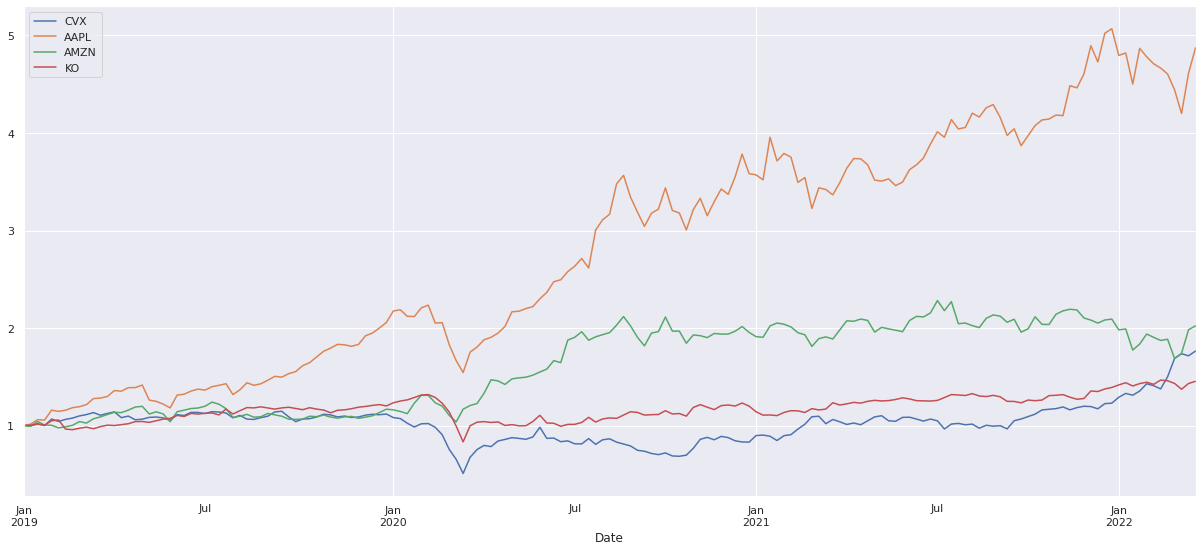

In [15]:
sns.set()
carteira_normalizada = carteira/carteira.iloc[0]
carteira_normalizada.plot(figsize=(21,9))

In [16]:
retorno = carteira.pct_change()
retorno

,CVX,AAPL,AMZN,KO
Date,,,,
2019-01-01,NaN,NaN,NaN,NaN
2019-01-08,-0.004810,0.013993,-0.007548,0.004260
2019-01-15,0.023720,0.045467,0.048843,0.009756
2019-01-22,-0.019236,-0.003316,-0.034377,-0.009242
2019-01-29,0.067487,0.095649,-0.002796,0.044096
...,...,...,...,...
2022-02-22,0.090630,-0.013031,0.006301,-0.004797
2022-03-01,0.125278,-0.035247,-0.104908,-0.018637
2022-03-08,0.028882,-0.054489,0.032011,-0.041585


In [17]:
retorno_anual = retorno.mean() 
retorno_anual

CVX     0.004704
AAPL    0.010395
AMZN    0.005038
KO      0.002764
dtype: float64

In [18]:
cov = retorno.cov() 
cov

,CVX,AAPL,AMZN,KO
CVX,0.002705,0.000661,0.000080,0.001093
AAPL,0.000661,0.001871,0.001056,0.000572
AMZN,0.000080,0.001056,0.001700,0.000183
KO,0.001093,0.000572,0.000183,0.001073


In [19]:
corr = retorno.corr()
corr

,CVX,AAPL,AMZN,KO
CVX,1.000000,0.294005,0.037145,0.641250
AAPL,0.294005,1.000000,0.592484,0.403578
AMZN,0.037145,0.592484,1.000000,0.135474
KO,0.641250,0.403578,0.135474,1.000000


In [20]:
num_acoes = len(acoes)
num_carteiras = 10000

lista_retornos = []
lista_volatilidade = []
lista_pesos = []
lista_sharpe_ratio = []

In [21]:
for carteira in range(num_carteiras):
  peso = np.random.random(num_acoes)
  peso /= np.sum(peso)
  lista_pesos.append(peso)
  retorno_esperado = np.dot(peso, retorno_anual)
  lista_retornos.append(retorno_esperado)
  volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
  lista_volatilidade.append(volatilidade)
  sharpe_ratio = retorno_esperado/volatilidade
  lista_sharpe_ratio.append(sharpe_ratio)

In [22]:
dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade': lista_volatilidade, 'Sharpe Ratio': lista_sharpe_ratio}
for contar,acao in enumerate(acoes):
  dic_carteiras[acao+' Peso'] = [Peso[contar] for Peso in lista_pesos]
portfolios = pd.DataFrame(dic_carteiras)
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]

portfolios = portfolios[colunas]
portfolios

,Retorno,Volatilidade,Sharpe Ratio,CVX Peso,AAPL Peso,AMZN Peso,KO Peso
0,0.005891,0.030283,0.194531,0.229069,0.261203,0.303031,0.206696
1,0.004053,0.035694,0.113546,0.459612,0.028562,0.078820,0.433006
2,0.006003,0.032553,0.184413,0.346346,0.298673,0.126597,0.228384
3,0.006000,0.030265,0.198251,0.207774,0.290696,0.270198,0.231331
4,0.006605,0.031353,0.210659,0.194813,0.389289,0.216323,0.199576
...,...,...,...,...,...,...,...
9995,0.007647,0.034356,0.222565,0.242276,0.552216,0.087205,0.118303
9996,0.006479,0.035405,0.183006,0.431369,0.366191,0.036886,0.165553
9997,0.005512,0.029082,0.189526,0.135792,0.229394,0.322613,0.312201
9998,0.005879,0.029748,0.197614,0.142542,0.277784,0.315780,0.263894


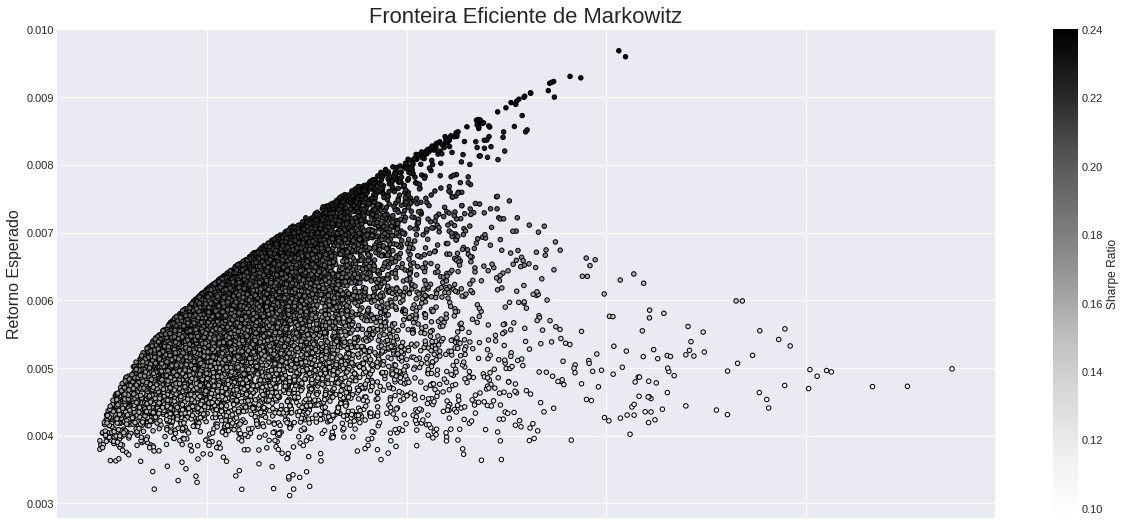

In [23]:
plt.style.use('seaborn-dark')
portfolios.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio', edgecolors='black', figsize=(21,9), grid=True)
plt.xlabel('Volatilidade', fontsize=16)
plt.ylabel('Retorno Esperado', fontsize=16)
plt.title('Fronteira Eficiente de Markowitz', fontsize=22)
plt.savefig('Fronteira.png', dpi = 500)

In [24]:
menor_volatilidade = portfolios['Volatilidade'].min()
carteira_min_variancia = portfolios.loc[portfolios['Volatilidade'] == menor_volatilidade]
carteira_min_variancia.T

,5430
Retorno,0.003799
Volatilidade,0.027327
Sharpe Ratio,0.139009
CVX Peso,0.036395
AAPL Peso,0.007476
AMZN Peso,0.398761
KO Peso,0.557369


In [25]:
maior_sharpe = portfolios['Sharpe Ratio'].max()
carteira_maior_sharpe = portfolios.loc[portfolios['Sharpe Ratio'] == maior_sharpe]
carteira_maior_sharpe.T

,3391
Retorno,0.009684
Volatilidade,0.040311
Sharpe Ratio,0.240243
CVX Peso,0.069343
AAPL Peso,0.881221
AMZN Peso,0.026766
KO Peso,0.022671
